In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('../../JACOB/total_df.csv')

In [3]:
df.columns.tolist()

['zip_code',
 'Monthly_Avg_Zip',
 'FL_Unemployment',
 'year',
 'Encoded_Zip',
 'total_pop',
 'households',
 'male_pop',
 'female_pop',
 'median_age',
 'male_under_5',
 'male_5_to_9',
 'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'female_under_5',
 'female_5_to_9',
 'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
 'population_1_year_and_over',
 'pop

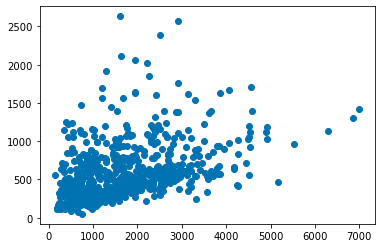

In [4]:
plt.scatter(df.unemployed_pop, df.vacant_housing_units_for_rent)

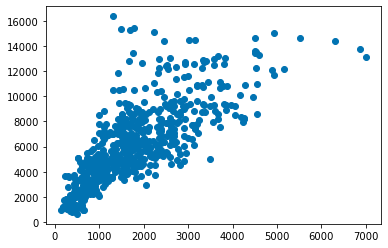

In [5]:
plt.scatter(df.unemployed_pop, df.high_school_diploma)

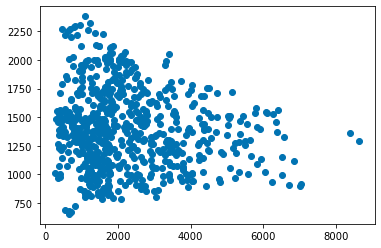

In [6]:
plt.scatter(df.in_undergrad_college, df.Monthly_Avg_Zip)

In [7]:
df.head()

,zip_code,Monthly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,...,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg
0,33160,1866.833333,7.533333,2013,73,37674,19247,18472,19202,49.6,...,4713.0,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.655
1,33025,1341.083333,7.533333,2013,41,57766,21206,27852,29914,32.9,...,8948.0,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.655
2,33139,1842.666667,7.533333,2013,61,38066,20883,22090,15976,38.1,...,4865.0,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.655
3,32256,947.750000,7.533333,2013,10,40024,18039,18865,21159,32.7,...,6247.0,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.655
4,33009,1443.416667,7.533333,2013,36,39889,19125,19256,20633,47.1,...,4958.0,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.655


In [8]:
new_df = df.set_index('zip_code').drop(columns = 'Encoded_Zip')
new_df.head()

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,37674,19247,18472,19202,49.6,626,654,...,4713.0,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.655
33025,1341.083333,7.533333,2013,57766,21206,27852,29914,32.9,2143,2102,...,8948.0,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.655
33139,1842.666667,7.533333,2013,38066,20883,22090,15976,38.1,981,513,...,4865.0,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.655
32256,947.750000,7.533333,2013,40024,18039,18865,21159,32.7,1084,1124,...,6247.0,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.655
33009,1443.416667,7.533333,2013,39889,19125,19256,20633,47.1,1213,830,...,4958.0,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.655


In [9]:
normalized_df=(new_df - new_df.min()) / (new_df.max() - new_df.min())

In [10]:
model = DBSCAN(eps = 0.1, min_samples = 9)
y_hat = model.fit_predict(new_df)

In [33]:
# y_hat

In [11]:
clusters = np.unique(y_hat)
clusters

array([-1])

In [12]:
normalized_df.head()

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,0.701893,1.0,0.0,0.452251,0.761098,0.459151,0.445670,0.667702,0.208556,0.187378,...,0.353171,0.262449,0.467841,0.353171,0.176738,0.300141,0.176666,0.244112,0.209130,0.0
33025,0.397809,1.0,0.0,0.744698,0.855626,0.738834,0.750291,0.149068,0.749376,0.658426,...,0.729348,0.565188,0.667841,0.729348,0.577212,0.847470,0.641782,0.789422,0.563815,0.0
33139,0.687915,1.0,0.0,0.457957,0.840041,0.567028,0.353931,0.310559,0.335116,0.141509,...,0.366673,0.759393,0.611813,0.366673,0.127370,0.136832,0.062146,0.193554,0.195626,0.0
32256,0.170313,1.0,0.0,0.486456,0.702808,0.470869,0.501322,0.142857,0.371836,0.340273,...,0.489430,0.242531,0.686079,0.489430,0.315561,0.359185,0.306430,0.453570,0.377629,0.0
33009,0.456997,1.0,0.0,0.484491,0.755211,0.482527,0.486364,0.590062,0.417825,0.244632,...,0.374933,0.398710,0.272746,0.374933,0.255727,0.223758,0.232167,0.245231,0.193117,0.0


In [13]:
full_model = KMeans(n_clusters = 4).fit(new_df.drop(columns = 'Monthly_Avg_Zip'))

In [14]:
mini_1_cols = ['million_dollar_housing_units', 'unemployed_pop', \
               'median_income', 'poverty', \
               'median_rent', 'percent_income_spent_on_rent']

In [28]:
mini_1 = new_df[mini_1_cols]
mini_1.shape
mini_df = mini_1
%store mini_df

Stored 'mini_df' (DataFrame)


In [16]:
mini_model_1 = KMeans(n_clusters = 3).fit(mini_1)

In [17]:
mini_1['cluster'] = mini_model_1.labels_

<ipython-input-17-7c8f7f17b5dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_1['cluster'] = mini_model_1.labels_


In [18]:
mini_1.head()

,million_dollar_housing_units,unemployed_pop,median_income,poverty,median_rent,percent_income_spent_on_rent,cluster
zip_code,,,,,,,
33160,821,1260.0,45627.0,5120.0,1258.0,34.0,1
33025,0,3667.0,51822.0,6940.0,1209.0,36.7,1
33139,829,1197.0,46612.0,6672.0,1036.0,31.8,1
32256,74,1943.0,54160.0,3937.0,862.0,28.7,1
33009,96,2823.0,33157.0,8460.0,942.0,39.3,0


In [19]:
mini_1_group = mini_1.groupby('cluster').aggregate(['mean', 'median'])
mini_1_group

million_dollar_housing_units        unemployed_pop          \
                                mean median           mean  median   
cluster                                                              
0                          50.028226   21.5    2235.092742  1989.0   
1                         149.580952   67.0    1514.371429  1298.0   
2                         247.000000  167.0     857.341463   723.0   

        median_income                poverty          median_rent          \
                 mean   median          mean  median         mean  median   
cluster                                                                     
0        34034.415323  35351.5  10090.592742  9174.5   814.850806   802.0   
1        53910.244444  52981.0   4909.177778  4521.0  1049.984127  1017.0   
2        78105.573171  76286.5   2888.743902  2242.5  1441.487805  1432.0   

        percent_income_spent_on_rent         
                                mean median  
cluster                                      
0                          39.091532  39.30  
1                          33.305714  33.30  
2                          31.409756  30.95

In [20]:
mini_1[mini_1.cluster == 2].shape

(82, 7)

In [21]:
total = df.set_index('zip_code')
total.head()

,Monthly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,male_under_5,...,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,73,37674,19247,18472,19202,49.6,626,...,4713.0,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.655
33025,1341.083333,7.533333,2013,41,57766,21206,27852,29914,32.9,2143,...,8948.0,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.655
33139,1842.666667,7.533333,2013,61,38066,20883,22090,15976,38.1,981,...,4865.0,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.655
32256,947.750000,7.533333,2013,10,40024,18039,18865,21159,32.7,1084,...,6247.0,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.655
33009,1443.416667,7.533333,2013,36,39889,19125,19256,20633,47.1,1213,...,4958.0,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.655


In [22]:
clustered = pd.merge(total, mini_1, on = mini_1.columns.tolist()[:-1] + ['zip_code'])

In [23]:
clustered.head()

,Monthly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,male_under_5,...,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg,cluster
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,73,37674,19247,18472,19202,49.6,626,...,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.655,1
33025,1341.083333,7.533333,2013,41,57766,21206,27852,29914,32.9,2143,...,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.655,1
33139,1842.666667,7.533333,2013,61,38066,20883,22090,15976,38.1,981,...,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.655,1
32256,947.750000,7.533333,2013,10,40024,18039,18865,21159,32.7,1084,...,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.655,1
33009,1443.416667,7.533333,2013,36,39889,19125,19256,20633,47.1,1213,...,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.655,0


In [27]:
clustered['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018])

In [25]:
# clustered.rename(columns = {'cluster': 'Wealth Class'}, inplace = True)

In [26]:
# def wealth_class(x):
#     if x == 0:
#         return 'lower class'
#     if x == 1:
#         return 'upper class'
#     if x == 2:
#         return 'middle class'
# clustered['Wealth Class'] = clustered['Wealth Class'].apply(wealth_class)

In [27]:
# clustered['Wealth Class']

zip_code
33160     lower class
33025     lower class
33139     lower class
32256     lower class
33009     upper class
             ...     
32828    middle class
33172     lower class
32827    middle class
33611     lower class
33605     upper class
Name: Wealth Class, Length: 645, dtype: object

In [24]:
clustered

,Monthly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,male_under_5,...,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg,cluster
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,73,37674,19247,18472,19202,49.6,626,...,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.6550,1
33025,1341.083333,7.533333,2013,41,57766,21206,27852,29914,32.9,2143,...,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.6550,1
33139,1842.666667,7.533333,2013,61,38066,20883,22090,15976,38.1,981,...,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.6550,1
32256,947.750000,7.533333,2013,10,40024,18039,18865,21159,32.7,1084,...,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.6550,1
33009,1443.416667,7.533333,2013,36,39889,19125,19256,20633,47.1,1213,...,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.6550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,1412.714286,3.625000,2018,31,65665,21327,30928,34737,34.0,1569,...,5583.0,15472.0,8267.0,3153,3359,4530,21487,5829,444.3875,2
33172,1747.571429,3.625000,2018,75,43083,13687,21261,21822,41.4,1422,...,4212.0,6942.0,7067.0,1744,1907,1736,9732,2452,444.3875,1
32827,1472.428571,3.625000,2018,30,9421,3498,4524,4897,37.1,96,...,628.0,2362.0,871.0,652,702,559,3109,720,444.3875,2


In [26]:
jordan_kmeans_df = clustered
# jordan_kmeans_df
%store jordan_kmeans_df

Stored 'jordan_kmeans_df' (DataFrame)


In [28]:
# clustered.to_csv('../data/clustered_df.csv')

In [29]:
# clustered.to_csv('../../clustered_df.csv')

In [30]:
lower_class = clustered[clustered['Wealth Class'] == 'lower class'].drop(columns = 'Wealth Class')
middle_class = clustered[clustered['Wealth Class'] == 'middle class'].drop(columns = 'Wealth Class')
upper_class = clustered[clustered['Wealth Class'] == 'upper class'].drop(columns = 'Wealth Class')

# The cell below can be copied to look at the differing relationships between variables in different clusters. Simply swap the column names in the first argument.

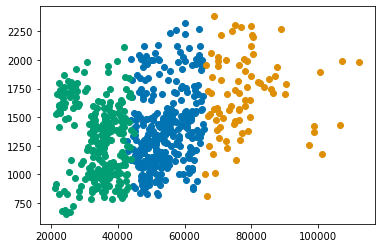

In [31]:
plt.figure()
plt.scatter(lower_class['median_income'], lower_class.Monthly_Avg_Zip)
plt.scatter(middle_class['median_income'], middle_class.Monthly_Avg_Zip)
plt.scatter(upper_class['median_income'], upper_class.Monthly_Avg_Zip)
plt.show()

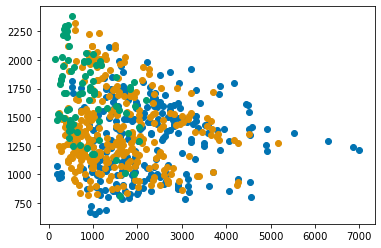

In [41]:
plt.figure()
plt.scatter(lower_class['unemployed_pop'], lower_class.Monthly_Avg_Zip)
plt.scatter(middle_class['unemployed_pop'], middle_class.Monthly_Avg_Zip)
plt.scatter(upper_class['unemployed_pop'], upper_class.Monthly_Avg_Zip)
plt.show()

In [42]:
clustered.columns.tolist()

['Monthly_Avg_Zip',
 'FL_Unemployment',
 'year',
 'Encoded_Zip',
 'total_pop',
 'households',
 'male_pop',
 'female_pop',
 'median_age',
 'male_under_5',
 'male_5_to_9',
 'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'female_under_5',
 'female_5_to_9',
 'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
 'population_1_year_and_over',
 'population_3_yea

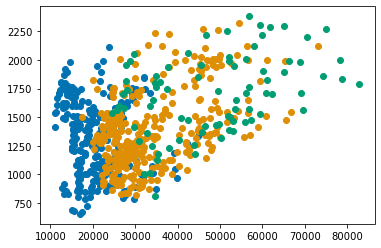

In [43]:
plt.figure()
plt.scatter(lower_class['income_per_capita'], lower_class.Monthly_Avg_Zip)
plt.scatter(middle_class['income_per_capita'], middle_class.Monthly_Avg_Zip)
plt.scatter(upper_class['income_per_capita'], upper_class.Monthly_Avg_Zip)
plt.show()

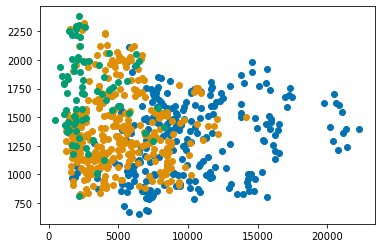

In [44]:
plt.figure()
plt.scatter(lower_class['poverty'], lower_class.Monthly_Avg_Zip)
plt.scatter(middle_class['poverty'], middle_class.Monthly_Avg_Zip)
plt.scatter(upper_class['poverty'], upper_class.Monthly_Avg_Zip)
plt.show()

In [49]:
low_model = DecisionTreeRegressor()
low_model.fit(lower_class.drop(columns = 'Monthly_Avg_Zip'), lower_class.Monthly_Avg_Zip)

In [56]:
col_lst = lower_class.drop(columns = 'Monthly_Avg_Zip').columns.tolist()
importance_lst = low_model.feature_importances_.tolist()

low_importaces_dct = {col: val for col, val in zip(col_lst, importance_lst)}

In [58]:
middle_model = DecisionTreeRegressor()
middle_model.fit(middle_class.drop(columns = 'Monthly_Avg_Zip'), middle_class.Monthly_Avg_Zip)

DecisionTreeRegressor()

In [59]:
col_lst = middle_class.drop(columns = 'Monthly_Avg_Zip').columns.tolist()
importance_lst = middle_model.feature_importances_.tolist()

middle_importaces_dct = {col: val for col, val in zip(col_lst, importance_lst)}

In [60]:
upper_model = DecisionTreeRegressor()
upper_model.fit(upper_class.drop(columns = 'Monthly_Avg_Zip'), upper_class.Monthly_Avg_Zip)

DecisionTreeRegressor()

In [61]:
col_lst = upper_class.drop(columns = 'Monthly_Avg_Zip').columns.tolist()
importance_lst = upper_model.feature_importances_.tolist()

upper_importaces_dct = {col: val for col, val in zip(col_lst, importance_lst)}

In [62]:
import pickle

In [64]:
# with open('../../low_importances_dct', 'wb') as file:
#     pickle.dump(low_importaces_dct, file)

# with open('../../middle_importances_dct', 'wb') as file:
#     pickle.dump(middle_importaces_dct, file)
    
# with open('../../upper_importances_dct', 'wb') as file:
#     pickle.dump(upper_importaces_dct, file)